In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
states = [1,2,3,4,5,6,7,8,9]
actions = ['droite', 'haut','gauche','bas']

In [48]:
matrix1 = np.random.rand(len(states),len(states))
matrix2 = np.random.rand(len(states),len(states))
matrix3 = np.random.rand(len(states),len(states))
matrix4 = np.random.rand(len(states),len(states))

matrix1 = matrix1/matrix1.sum(axis=1)[:,None]
matrix2 = matrix2/matrix2.sum(axis=1)[:,None]
matrix3 = matrix3/matrix3.sum(axis=1)[:,None]
matrix4 = matrix4/matrix4.sum(axis=1)[:,None]

In [49]:
def transition_matrix_random(u, m1, m2,m3,m4):
    if u == 'gauche':
        tr = m1
    if u == 'droite':
        tr = m2
    if u == 'haut':
        tr = m3
    if u == 'bas':
        tr = m4
    return(tr)

In [50]:
def transition_random(s, u, m1, m2,m3,m4):
    tr = transition_matrix_random(u, m1, m2,m3,m4)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

In [51]:
def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

In [52]:
def env_step_random(s, u, m1, m2,m3,m4):
    next_state = transition_random(s, u, m1, m2,m3,m4)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

# Q-learning algorithm

In [53]:
q_table_random = np.zeros([len(states),len(actions)])

In [54]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

In [55]:
for i in range(10000):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1
    
    epochs, penalties, rew = 0, 0, 0
    done = False
    
    for j in range(5):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table_random[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step_random(s, u, matrix1, matrix2, matrix3, matrix4)
        next_state_index = next_state - 1
        
        old_value = q_table_random[state_index, action_index]
        next_max = np.max(q_table_random[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table_random[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



In [56]:
print(actions)
print(q_table_random)

['droite', 'haut', 'gauche', 'bas']
[[  0.51000105   0.07892471   0.70260018   3.00012506]
 [  2.34335731   0.94897402   1.25548239   0.70662916]
 [ 12.16193988  10.61525767  10.58125247  10.59371482]
 [-11.06413508 -11.01252863 -11.06297382  -8.60182994]
 [ -0.39078768   0.39305681   4.0639255    0.78796465]
 [  1.89253538  -0.25651533   0.59313265   0.56598393]
 [  0.61289255   0.12603179   2.07764567   0.87547477]
 [  3.11530037   1.33178167   0.30250814   0.6951124 ]
 [  0.38481462  -0.95365487   0.40746892   0.80627799]]


## Computing optimal values using value iteration algorithm

In [57]:
q_dp_random = np.zeros([len(states),len(actions)])
q_dp_random[2]=10
q_dp_random[3]=-10


In [58]:
for t in range(100, 0,-1):
    q_dp_random_new = q_dp_random.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_random(u, matrix1, matrix2, matrix3, matrix4)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_random, axis = 1)
            q_dp_random_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_random = q_dp_random_new

In [59]:
print(actions)
q_dp_random

['droite', 'haut', 'gauche', 'bas']


array([[ 0.35685379,  0.37876481,  0.22580364,  1.99508499],
       [ 2.45578408,  1.09224185,  1.21405838,  1.01963287],
       [11.87003389, 11.58738323, 11.21625512, 11.60446863],
       [-9.85917018, -9.83375969, -9.77696181, -9.44750099],
       [ 0.51072672,  0.99697855,  2.28854134,  1.73124755],
       [ 1.7775266 ,  0.6834129 ,  1.61494613,  1.39717459],
       [ 2.18296487,  0.67822177,  1.91486822,  1.61470726],
       [ 2.3605162 ,  1.18127884,  0.46853278,  1.18593365],
       [ 0.97288621,  0.31629629,  0.63345081,  1.20108628]])

In [60]:
#error
(np.mean((q_table_random-q_dp_random)**2))**0.5

0.8056988819182915

## Comparing number of iterations vs error

In [61]:
time_steps = np.logspace(1, 6, 10, endpoint=True).astype(int)
error = np.zeros(len(time_steps))

In [62]:
for k in range(len(time_steps)):
    print(k)
    time = time_steps[k]
    q_table_random = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_random[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_random(s, u, matrix1, matrix2, matrix3, matrix4)
            next_state_index = next_state - 1

            old_value = q_table_random[state_index, action_index]
            next_max = np.max(q_table_random[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_random[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error[k] = (np.mean((q_table_random-q_dp_random)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9
Training finished.



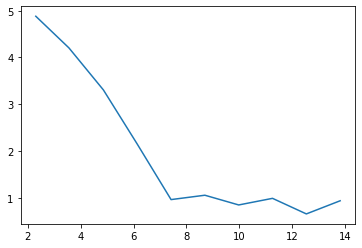

In [64]:
plt.plot(np.log(time_steps), error)